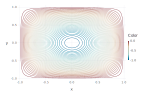

In [6]:
using Gadfly
p(x,y) = -cos(0.5*pi*x)*cos(0.5*pi*y);
plot(z=p, x=linspace(-1,1,200), y=linspace(-1,1,200), Geom.contour(levels=40))
# function for homogeneous Dirichlet boundary conditions

In [12]:
using SymPy
x = sympy.Symbol("x", real=true);
y = sympy.Symbol("y", real=true);
spi = sympy.Symbol("\pi", real=true);
a = sqrt(2)*pi/3;
um = cos(a*(x-y-pi/3));
up = cos(a*(x+y+pi/3));
ex = [um + up, um - up];
sex = Sym[simplify(e) for e in ex]
#ex = cos(0.5*spi*x)*cos(0.5*spi*y)
display(Sym(diff(ex[1],x) + diff(ex[2],y)));

grad_p = [diff(p(x,y),x), diff(p(x,y),y)];
div_grad_p = diff(grad_p[1], x) + diff(grad_p[2], y);
integrate(integrate(div_grad_p, (x,-1.0,1.0)), (y,-1.0,1.0))

0

8.00000000000000

INFO: Loading help data...
    plot(Array{Sym,1},Real,Real,Any,Any...) at /Users/egor/.julia/v0.3/SymPy/src/plot.jl:219
is ambiguous with: 
    plot(Array{T,N},Any,Any,Union(Theme,DataType,Function,Element)...) at /Users/egor/.julia/v0.3/Gadfly/src/poetry.jl:20.
To fix, define 
    plot(Array{Sym,1},Real,Real,Union(Theme,DataType,Function,Element),Union(Theme,DataType,Function,Element)...)
before the new definition.
    plot(Array{T,N},Array{Sym,1},Real,Real,Any,Any...)
is ambiguous with: 
    plot(Array{T,N},Array{T,N},Any,Any,Union(Theme,DataType,Function,Element)...).
To fix, define 
    plot(Array{T,N},Array{Sym,1},Real,Real,Union(Theme,DataType,Function,Element),Union(Theme,DataType,Function,Element)...)
before the new definition.


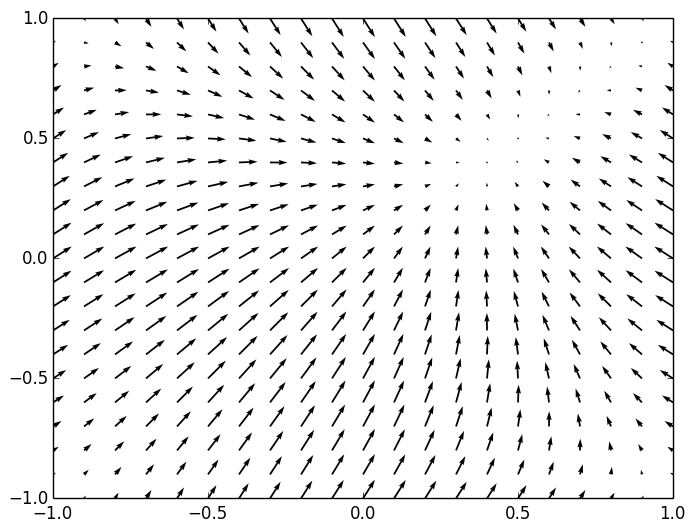

PyObject <matplotlib.quiver.Quiver object at 0x118954b90>

In [14]:
using PyPlot
meshgrid(v::AbstractVector) = meshgrid(v, v)
function meshgrid{T}(vx::AbstractVector{T}, vy::AbstractVector{T})
    m, n = length(vy), length(vx)
    vx = reshape(vx, 1, n)
    vy = reshape(vy, m, 1)
    (repmat(vx, m, 1), repmat(vy, 1, n))
end

X,Y = meshgrid( -1:.1:1, -1:.1:1);
U = cos(0.5*pi*X) - 0.5*pi*sin(0.5*pi*X).*cos(0.5*pi*Y);
V = cos(0.5*pi*Y) - 0.5*pi*sin(0.5*pi*Y).*cos(0.5*pi*X);
# Input velocity field
Q = quiver(X, Y, U, V)

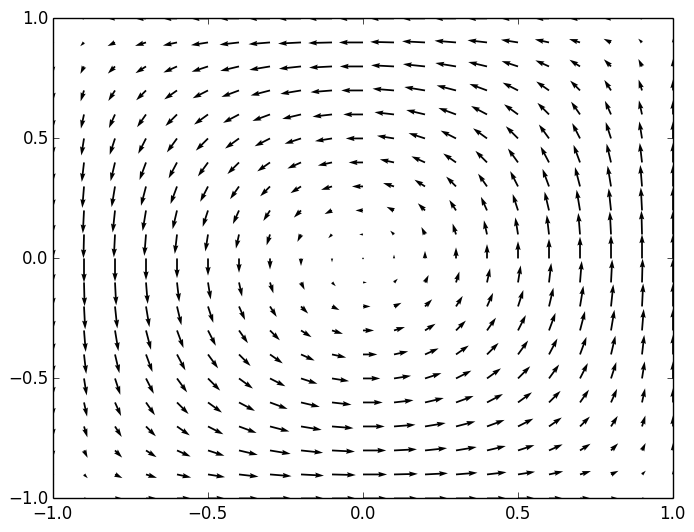

PyObject <matplotlib.quiver.Quiver object at 0x1169ec510>

In [20]:
X,Y = meshgrid( -1:.1:1, -1:.1:1);
sqinv = 1/sqrt(2);
a = pi/2;
U = sqinv*(cos(a*(X - Y) - pi/2) + cos(a*(X+Y)+pi/2));
V = sqinv*(cos(a*(X - Y) - pi/2) - cos(a*(X+Y)+pi/2));
 # Output given pressure
Q = quiver(X, Y, U, V)

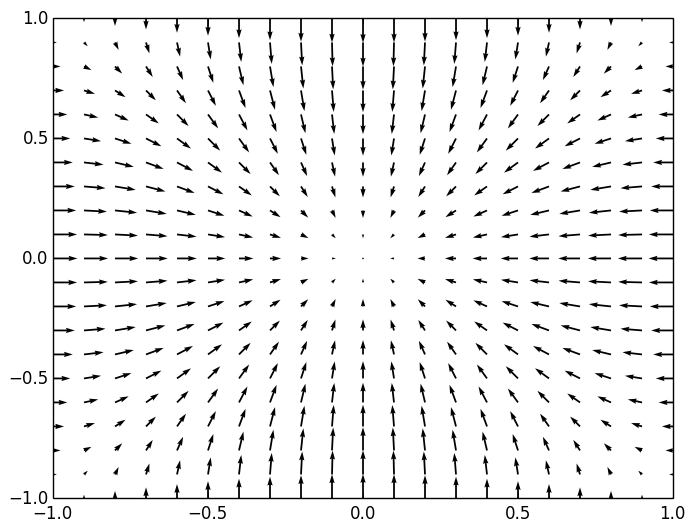

PyObject <matplotlib.quiver.Quiver object at 0x12183c610>

In [144]:
U2 = - 0.5*pi*sin(0.5*pi*X).*cos(0.5*pi*Y)
V2 = - 0.5*pi*sin(0.5*pi*Y).*cos(0.5*pi*X);
Q = quiver(X, Y, U2, V2)

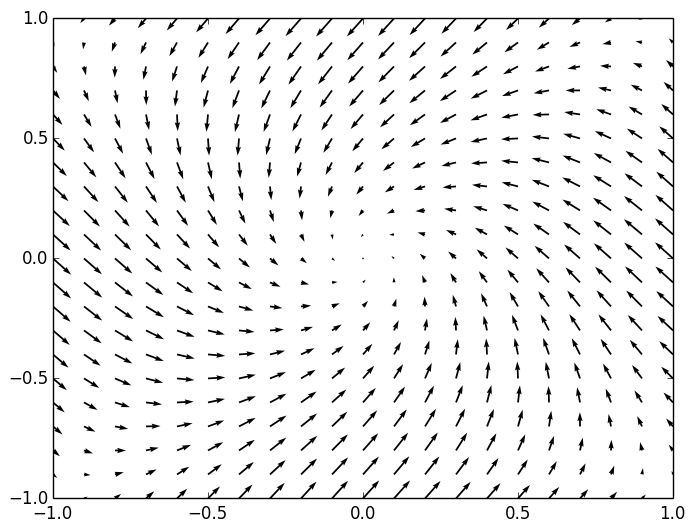

PyObject <matplotlib.quiver.Quiver object at 0x121d60810>

In [146]:
U3 = U + U2;
V3 = V + V2;
Q = quiver(X, Y, U3, V3)